# Principal Component Analysis with Cancer Data

In [68]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [69]:
cancer = pd.read_csv("cancer.csv")

In [70]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [71]:
cancer.head(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [72]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [73]:
cancer.shape

(699, 11)

In [74]:
cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [75]:
# We could see "?" values in column, this should be removed from data set
cancer.isnull()
# Check for missing value in any other column

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [76]:
cancer.drop_duplicates(keep=False, inplace=True)

In [77]:
# No missing values found. So let us try to remove ? from bare nuclei column
cancer.groupby('Bare Nuclei').count()
# Get count of rows having ?

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
Bare Nuclei,,,,,,,,,,
1,392,392,392,392,392,392,392,392,392,392
10,128,128,128,128,128,128,128,128,128,128
2,30,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8,8
8,19,19,19,19,19,19,19,19,19,19


In [78]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [79]:
temp = pd.DataFrame(cancer['Bare Nuclei'].str.isdigit())  
temp[temp['Bare Nuclei'] == False]   

cancer = cancer.replace('?', np.nan)
cancer = cancer.apply(lambda x: x.fillna(x.median()),axis=0)

In [80]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].astype('float64')  

In [81]:
cancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

# Q4. Perform bi variate analysis including correlation & pairplots. 


In [82]:
# Check for correlation of variable
cancer.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.063102,-0.044976,-0.042799,-0.067630,-0.049813,-0.089904,-0.059231,-0.055976,-0.037122,-0.078678
ClumpThickness,-0.063102,1.000000,0.641744,0.652925,0.489557,0.512964,0.591721,0.563792,0.535582,0.350676,0.717911
Cell Size,-0.044976,0.641744,1.000000,0.903901,0.720908,0.742223,0.682845,0.763451,0.731788,0.461504,0.817538
Cell Shape,-0.042799,0.652925,0.903901,1.000000,0.699192,0.708879,0.701181,0.741057,0.730159,0.442361,0.816426
Marginal Adhesion,-0.067630,0.489557,0.720908,0.699192,1.000000,0.617739,0.678655,0.672991,0.601522,0.416689,0.706065
Single Epithelial Cell Size,-0.049813,0.512964,0.742223,0.708879,0.617739,1.000000,0.577605,0.625126,0.639503,0.486362,0.679651
Bare Nuclei,-0.089904,0.591721,0.682845,0.701181,0.678655,0.577605,1.000000,0.671130,0.582183,0.343680,0.814548
Normal Nucleoli,-0.059231,0.563792,0.763451,0.741057,0.672991,0.625126,0.671130,1.000000,0.672310,0.343478,0.756623
Bland Chromatin,-0.055976,0.535582,0.731788,0.730159,0.601522,0.639503,0.582183,0.672310,1.000000,0.426937,0.718929
Mitoses,-0.037122,0.350676,0.461504,0.442361,0.416689,0.486362,0.343680,0.343478,0.426937,1.000000,0.425083


In [83]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

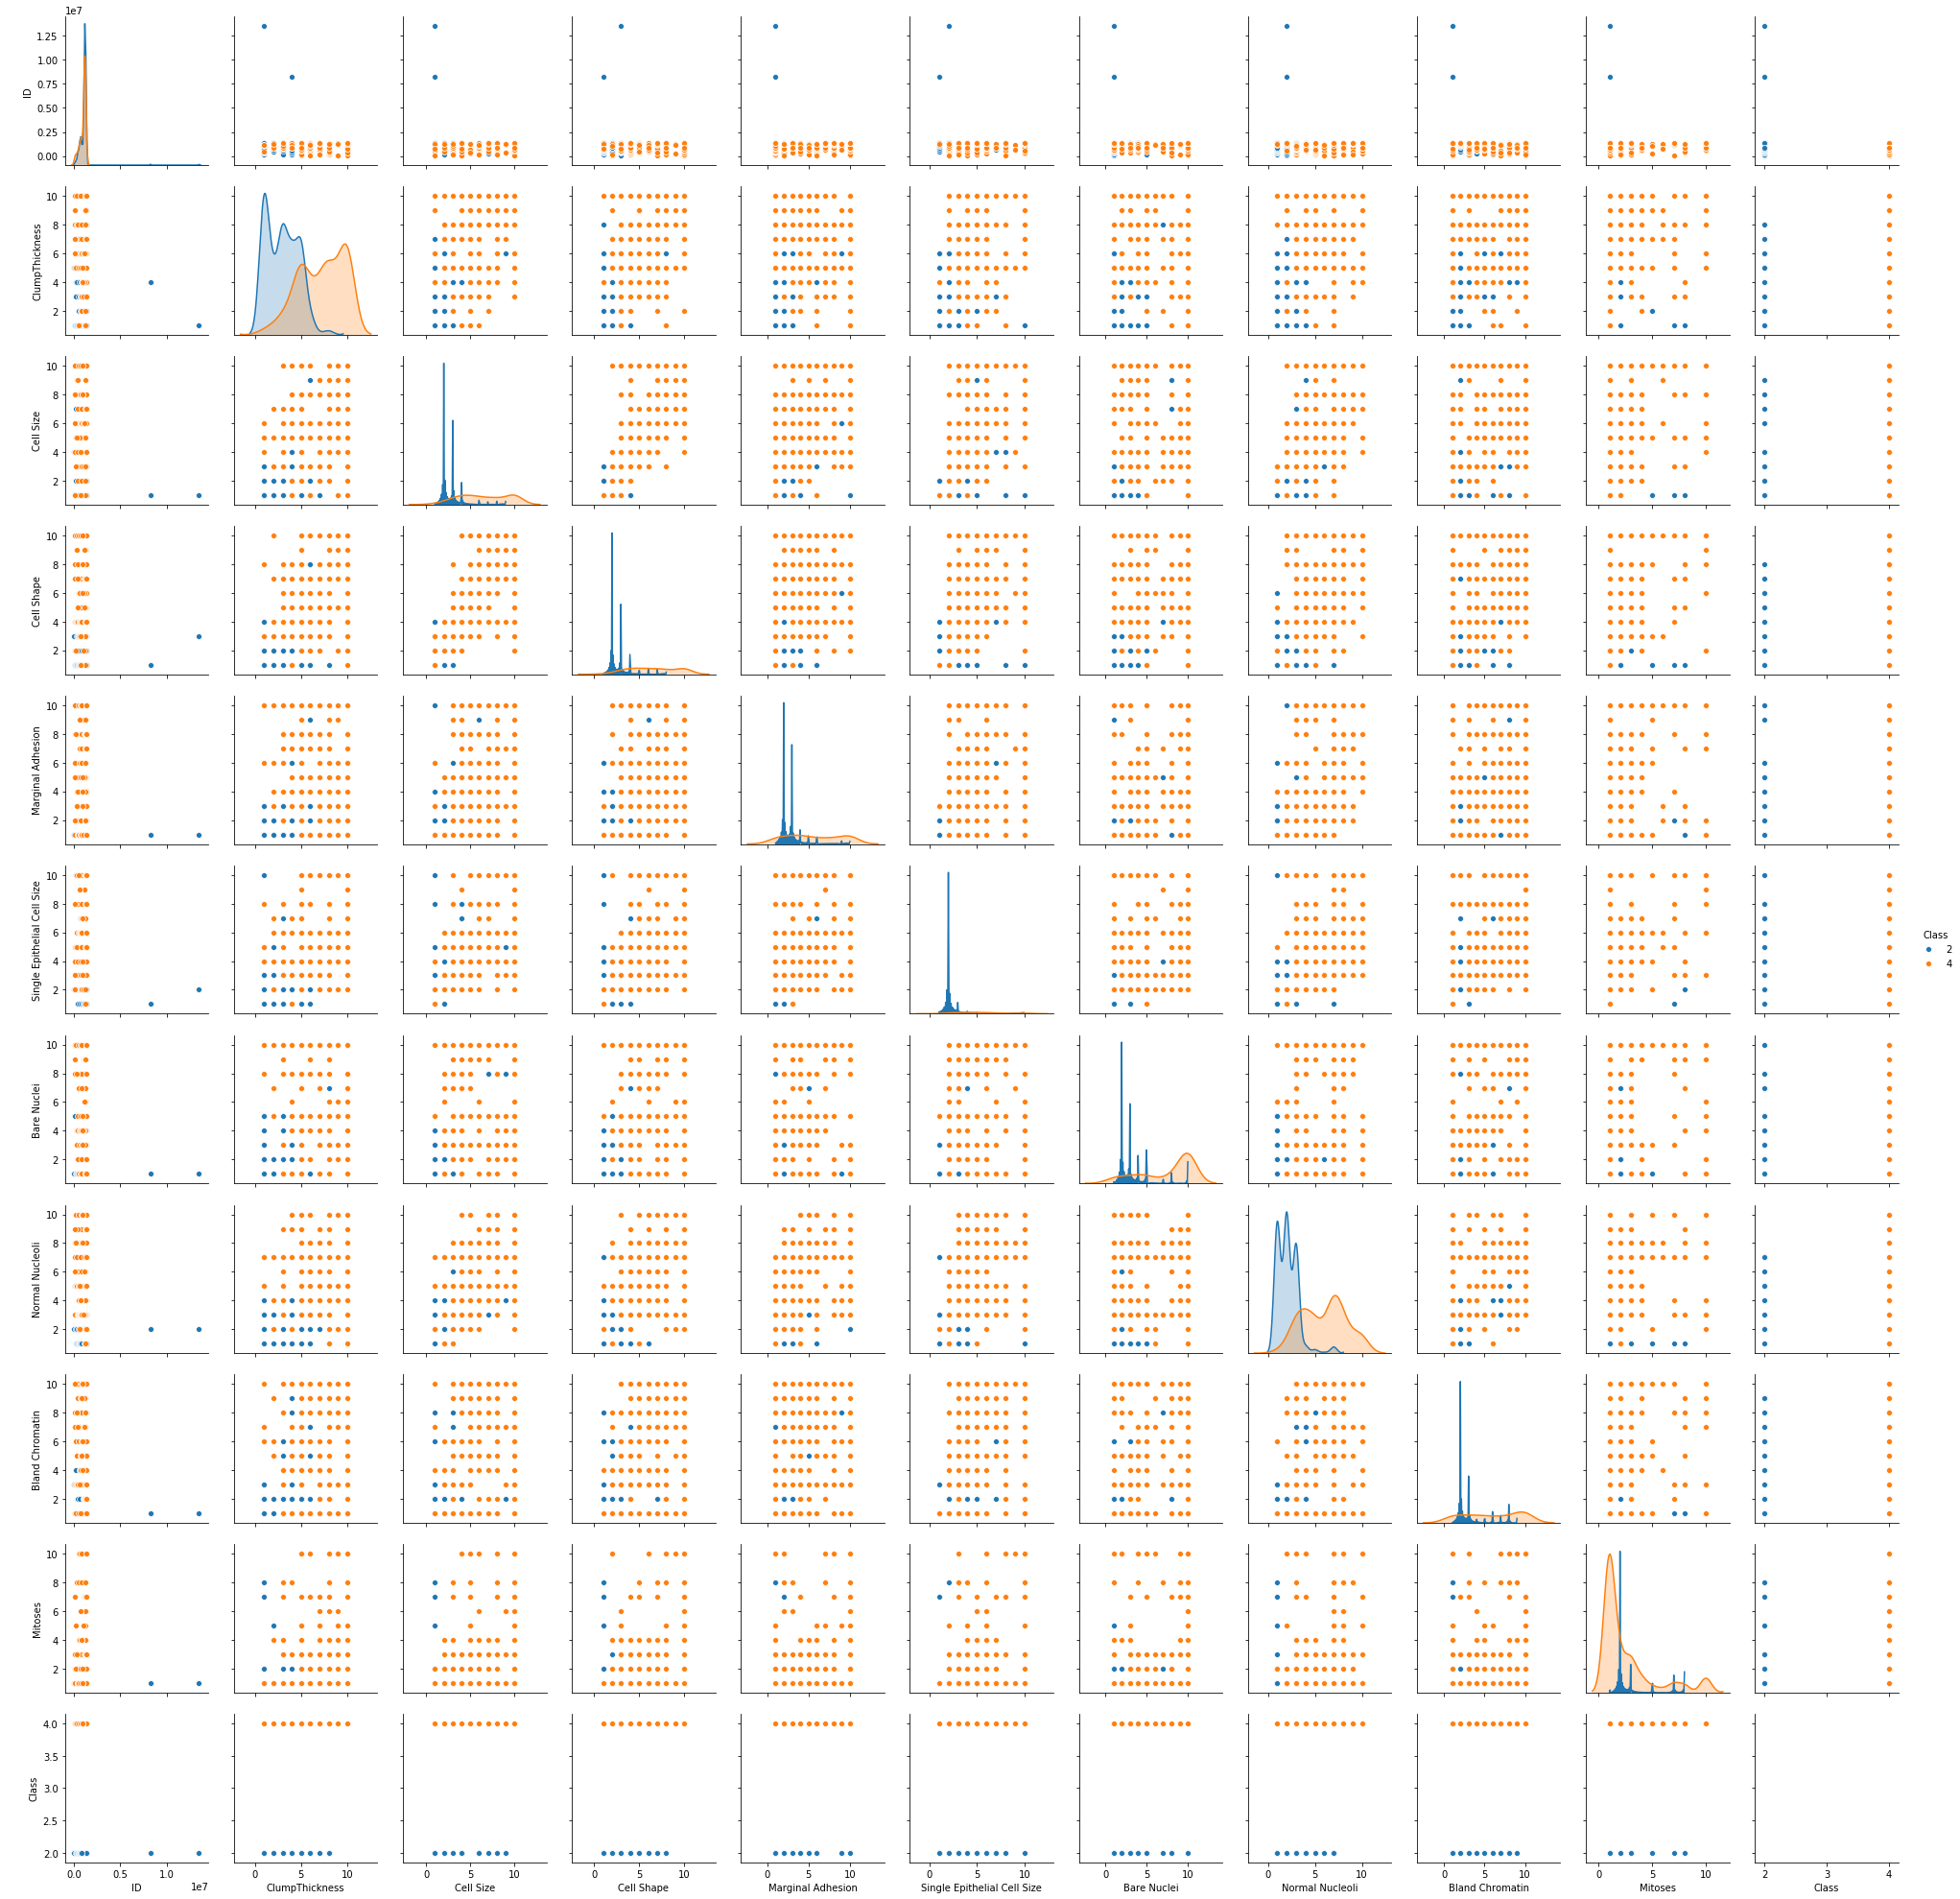

In [84]:
#Let us check for pair plots
sns.pairplot(cancer, diag_kind = "kde", hue = "Class")

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [85]:
# We could see most of the outliers are now removed.

In [86]:
cancer_df = cancer.drop('ID', axis=1)

In [87]:
X = cancer_df[cancer_df.columns[1:-1]]
y = cancer_df["Class"]

In [88]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [89]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)

C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [90]:
# PCA
# Step 1 - Create covariance matrix

In [91]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00146628 0.90522601 0.72196486 0.74331134 0.68384648 0.76457068
  0.73286069 0.46218096]
 [0.90522601 1.00146628 0.70021741 0.7099183  0.70220928 0.74214403
  0.73122981 0.44300916]
 [0.72196486 0.70021741 1.00146628 0.61864498 0.67964981 0.67397729
  0.60240447 0.4172999 ]
 [0.74331134 0.7099183  0.61864498 1.00146628 0.57845196 0.62604243
  0.64044055 0.48707557]
 [0.68384648 0.70220928 0.67964981 0.57845196 1.00146628 0.67211424
  0.58303707 0.34418433]
 [0.76457068 0.74214403 0.67397729 0.62604243 0.67211424 1.00146628
  0.67329615 0.34398191]
 [0.73286069 0.73122981 0.60240447 0.64044055 0.58303707 0.67329615
  1.00146628 0.42756345]
 [0.46218096 0.44300916 0.4172999  0.48707557 0.34418433 0.34398191
  0.42756345 1.00146628]]


# Q7 Identify eigen values and eigen vector

In [92]:
# Step 2- Get eigen values and eigen vector

In [93]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.39770533 -0.06182462 -0.73862106 -0.1778727  -0.08804314 -0.40100751
   0.30203323 -0.03202721]
 [-0.39271873 -0.09068756  0.66203942 -0.15930062 -0.01450636 -0.53567994
   0.28278208  0.08213246]
 [-0.355742   -0.09630416  0.04566557  0.48810421 -0.1206679  -0.07844337
  -0.30410995 -0.71459437]
 [-0.35382645  0.15761524  0.0652625  -0.29166646 -0.76450898  0.32843857
  -0.21719002  0.14532169]
 [-0.34519601 -0.25197398 -0.06971969  0.56942097  0.0821473   0.02986409
  -0.20753799  0.66146481]
 [-0.36373149 -0.25480592  0.06630188 -0.03144398  0.23562367  0.65699847
   0.53834896 -0.1428411 ]
 [-0.35437356 -0.00557493 -0.02167392 -0.49584645  0.53748326  0.05899578
  -0.57922358 -0.01364298]
 [-0.24251896  0.90850889  0.00846544  0.22040169  0.20456859  0.04685478
   0.14409821  0.04836948]]

 Eigen Values 
%s [5.43009503 0.77150208 0.09190906 0.46610297 0.36249048 0.27773261
 0.29550477 0.31639322]


# Q8 Find variance and cumulative variance by each eigen vector

In [94]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.430095034173188, array([-0.39770533, -0.39271873, -0.355742  , -0.35382645, -0.34519601,
       -0.36373149, -0.35437356, -0.24251896])), (0.7715020768313852, array([-0.06182462, -0.09068756, -0.09630416,  0.15761524, -0.25197398,
       -0.25480592, -0.00557493,  0.90850889])), (0.46610297110566185, array([-0.1778727 , -0.15930062,  0.48810421, -0.29166646,  0.56942097,
       -0.03144398, -0.49584645,  0.22040169])), (0.3624904794239163, array([-0.08804314, -0.01450636, -0.1206679 , -0.76450898,  0.0821473 ,
        0.23562367,  0.53748326,  0.20456859])), (0.3163932176893527, array([-0.03202721,  0.08213246, -0.71459437,  0.14532169,  0.66146481,
       -0.1428411 , -0.01364298,  0.04836948])), (0.2955047660113441, array([ 0.30203323,  0.28278208, -0.30410995, -0.21719002, -0.20753799,
        0.53834896, -0.57922358,  0.14409821])), (0.2777326050351861, array([-0.40100751, -0.53567994, -0.07844337,  0.32843857,  0.02986409,
        0.65699847,  0.05899578,  0.04685478])), (0.09

In [95]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

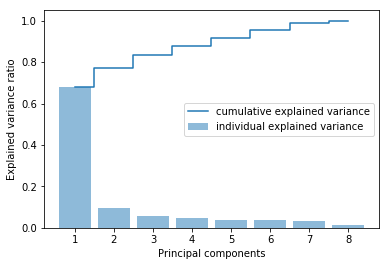

In [96]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [99]:
X_pca = pca.transform(X)

In [100]:
X_pca.shape

(683, 3)

# Q10 Find correlation between components and features

In [105]:
X_new = pd.DataFrame(data =X_pca,columns=['pc1','pc2', 'pc3'])

In [106]:
X_new.head(5)

,pc1,pc2,pc3
0,-4.814090,0.170682,0.014154
1,4.869623,-4.990320,0.382977
2,-4.357733,-0.619857,-0.328704
3,4.866437,3.549953,-2.748989
4,-4.097800,-0.127366,1.272328


In [109]:
result = pd.concat([X, X_new], axis=1, sort=False)

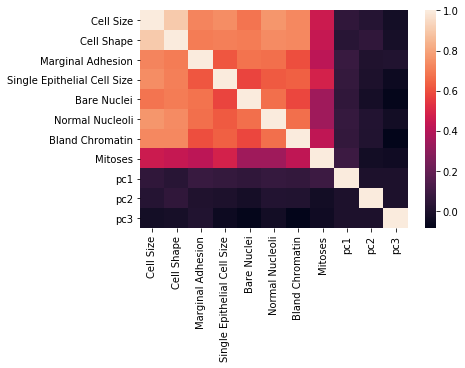

In [111]:
sns.heatmap(result.corr())

In [112]:
cancer_new = pd.concat([X_new,y], axis=1, sort=False)

In [113]:
cancer_new.head()

,pc1,pc2,pc3,Class
0,-4.814090,0.170682,0.014154,2.0
1,4.869623,-4.990320,0.382977,2.0
2,-4.357733,-0.619857,-0.328704,2.0
3,4.866437,3.549953,-2.748989,2.0
4,-4.097800,-0.127366,1.272328,2.0


C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\maneshwa\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\

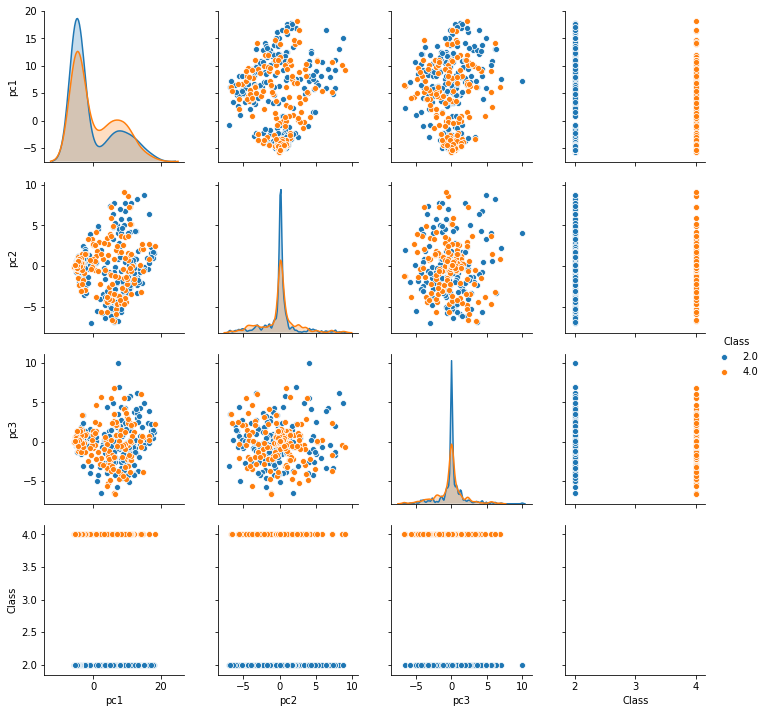

In [114]:
sns.pairplot(cancer_new, diag_kind = "kde", hue = "Class")